In [2]:
import pandas as pd
import numpy as np
import datetime as dt 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import io
from geopy.geocoders import Nominatim
from pandas.api.types import CategoricalDtype

In [3]:
pd.set_option('display.max_columns', None)

In [142]:
feed = pd.read_csv("feeds.csv")
user = pd.read_csv("users.csv")
video = pd.read_csv("videos.csv")
watchedVideo = pd.read_csv("watchedVideo.csv")

## Data Cleaning and Transformation

### Check for null values

In [143]:
user.isna().sum()

Unnamed: 0     0
id             0
created_at     0
class          0
coordinates    0
dtype: int64

In [144]:
video.isna().sum()

Unnamed: 0      0
id              0
attribute_id    0
music_id        0
animation_id    0
duration        0
creator         0
created_at      0
num_shares      0
game_id         0
is_ar           0
dtype: int64

In [145]:
watchedVideo.isna().sum()

Unnamed: 0     0
coordinates    0
os             0
duration       0
videoId        0
userId         0
appVersion     0
dateTime       0
feedId         0
dtype: int64

## Check distributions and outliers

In [146]:
user = user[['id', 'created_at', 'class', 'coordinates']]
user.rename(columns={'coordinates': 'user_coord'}, inplace=True)
user.head()

,id,created_at,class,user_coord
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')"
1,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-04-09 19:55:07,Viewer,"('43.71032', '-1.05366')"
2,5ebd5e12-ba2a-4bf9-b7e4-92ad24711cd4,2021-04-08 21:48:45,Super Gamer,"('51.26', '-2.1875')"
3,30986592-0cbf-43bb-83ed-7501ab3bd373,2021-05-15 00:45:51,Creator,"('40.65538', '-74.38987')"
4,25b49125-34d1-4694-a4a9-8415bcc3567b,2021-07-05 04:08:53,Viewer,"('35.61452', '-88.81395')"


### Distribution in User dataframe

Text(0.5, 1.0, 'Distribution of class')

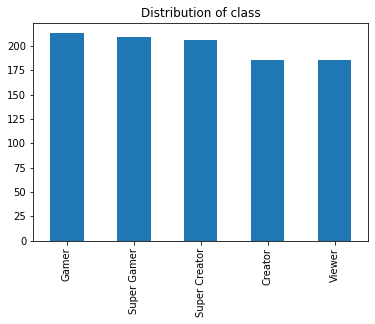

In [151]:
user['class'].value_counts().plot(kind='bar')
plt.xticks([0,1,2,3, 4],['Gamer', 'Super Gamer', 'Super Creator', 'Creator', 'Viewer'])
plt.title("Distribution of class")

In [148]:
print(user['created_at'].min())
print(user['created_at'].max())

2021-01-01 02:31:57
2021-12-15 06:52:35


### Distribution in Video dataframe

/Users/phuongtran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot for Video Duration')

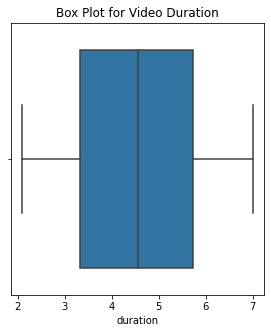

In [153]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
ax = fig.add_subplot(121)
sns.boxplot(video['duration'])
ax.set_title('Box Plot for Video Duration')

In [154]:
video['attribute_id'].value_counts()

25e7fab9-abfb-4a74-a8cb-c3adbc6e3531    483
c3328117-4129-4d8b-8250-9479e9c6a389    474
7ef48c9e-776d-4d24-8c2b-e3675b295767    466
80f5b187-f6e6-40f2-9b6e-fe62b67049a8    465
4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e    463
4712e9e6-bef1-4646-b21e-ca5336901bf9    460
06c496ee-e884-42f9-ba39-010a66ed5296    447
02b2b662-1b39-4d91-9417-dddc9451d8e1    442
3390e253-7815-4a3c-8169-fd2ab532e166    439
e339ba35-ffef-403b-a17c-dd218fdbb915    435
30fa7949-1cb6-44b1-9c7b-42c7421fc504    426
Name: attribute_id, dtype: int64

In [155]:
video['music_id'].value_counts()

c3721b09-6896-465a-8e13-4d73efd06874    550
b5b679a5-e769-4d95-82a6-f75e439b1ef9    548
19e4db13-d854-4913-a8ca-3612ee1a6071    512
8ff50feb-3b5d-4dd0-84b0-8409753bd166    509
da2fc9b0-32d5-4a1b-8b40-2706eb133bf0    491
3de11516-8627-47c3-98ab-265b429cac91    488
d53234f4-1efb-4299-97c1-11658118cba5    481
4ee0de5b-e27f-4d73-a3c6-52cf26e36c54    475
e2bf5d12-edc2-47cb-b23f-1f4f7c1a2292    474
1f80192e-3bff-41b8-b272-7062b9d7b6de    472
Name: music_id, dtype: int64

In [156]:
video['animation_id'].value_counts()

d167d0af-a662-48ad-bb39-5aa306fc8141    359
6d7a0545-0bca-4bf4-a306-931e57d8ffe2    355
435320a3-8d3d-4a9d-b76b-2f2e268f7619    346
4cfc4892-2c7e-46e3-8399-5b138285d394    345
716c02df-bd3a-41c9-b2be-86fb74ff3255    340
542d7532-e88a-48ca-826f-c11f0f615bc4    340
b5349df0-23dd-4973-b47d-ae5df5a4e247    340
b7bd5204-2976-4eb0-ab71-508a848bc325    337
ace4c5e2-ef86-429a-aad3-23bef7a1c9f1    335
ff1a548b-e307-474c-a405-6370ca1a0639    333
17dab81c-6180-4a4b-b539-91978a726cfd    330
2029f213-1719-4108-8125-25d465cf475d    325
ab5dc9f1-deb4-44d4-88ff-62e473a060f4    315
7410fff9-7a21-4c93-8a54-a6f4c9e55b04    309
08dda558-a151-45a2-8e43-1ba6f2891800    291
Name: animation_id, dtype: int64

In [158]:
video['game_id'].value_counts()

8bd4c7be-fe87-45ad-990d-d131cd3d9c77    1021
66653b7c-b600-49b3-a58c-d1862e91d426    1010
6ca0f645-a16b-42b0-9dc2-2ae952c83591    1002
4d54f6ab-cd8f-43a5-9be0-c497c2c32d24     997
2609b6b5-3a08-451e-bce5-75fe506559d2     970
Name: game_id, dtype: int64

Text(0.5, 1.0, 'Distribution of AR Videos')

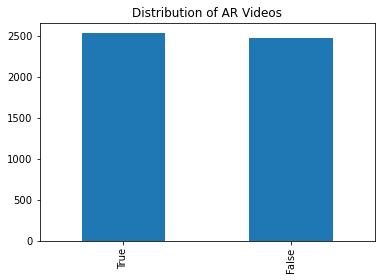

In [161]:
video['is_ar'].value_counts().plot(kind='bar')
plt.xticks([0,1],['True', 'False'])
plt.title("Distribution of AR Videos")

In [160]:
print(video['created_at'].min())
print(video['created_at'].max())

2021-01-11 12:50:38
2021-12-15 11:09:05


### Distribution in watchedVideo dataframe

Text(0.5, 1.0, 'Distribution of os')

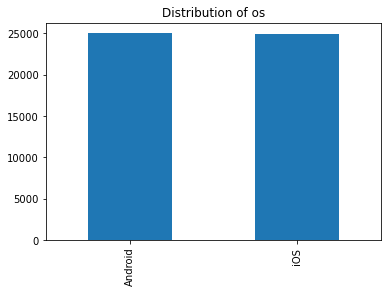

In [162]:
watchedVideo['os'].value_counts().plot(kind='bar')
plt.xticks([0,1],['Android', 'iOS'])
plt.title("Distribution of os")

Since both Android and iOS have the same amount of users who interacted with the videos (watching video), Krikey should make product change similar to both platform.

/Users/phuongtran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot for Duration Watched Video')

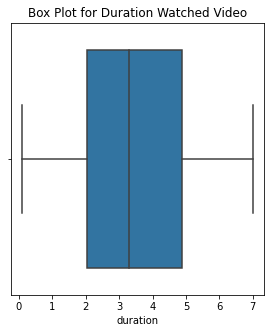

In [163]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
ax = fig.add_subplot(121)
sns.boxplot(watchedVideo['duration'])
ax.set_title('Box Plot for Duration Watched Video')

In [164]:
watchedVideo['appVersion'].value_counts()

2.1.2    5134
3.0.0    5086
2.2.3    5070
2.1.0    4978
2.2.4    4967
2.2.2    4965
3.0.1    4961
2.2.1    4960
2.1.1    4951
2.2.0    4928
Name: appVersion, dtype: int64

In [217]:
print(watchedVideo['dateTime'].min())
print(watchedVideo['dateTime'].max())

2021-01-20 15:38:52
2021-12-15 11:20:06


###  Data Transformation

#### Coordinates

In [218]:
watchedVideo['watch_lat'] = watchedVideo['coordinates'].str.split(',', expand=True)[0]
watchedVideo['watch_long'] = watchedVideo['coordinates'].str.split(',', expand=True)[1]

watchedVideo['watch_lat'] = watchedVideo['watch_lat'].str[10:]
watchedVideo['watch_lat'] = watchedVideo['watch_lat'].str[:-2]
watchedVideo['watch_long'] = watchedVideo['watch_long'].str[10:]
watchedVideo['watch_long'] = watchedVideo['watch_long'].str[:-3]

watchedVideo['watch_lat'] = watchedVideo['watch_lat'].astype('str') 
watchedVideo['watch_long'] = watchedVideo['watch_long'].astype('str') 

In [219]:
watchedVideo.head()

,Unnamed: 0,coordinates,os,duration,videoId,userId,appVersion,dateTime,feedId,month_watch,watch_lat,watch_long
0,0,"(Decimal('14.439490'), Decimal('105.291233'))",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,30134b9e-1b79-43fb-b0c5-373af9237b2c,8,14.439490,105.291233
1,1,"(Decimal('40.866935'), Decimal('-73.845013'))",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,8078efe7-5bae-4528-9a66-b85904cc73ac,7,40.866935,-73.845013
2,2,"(Decimal('48.666850'), Decimal('9.359456'))",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,12,48.666850,9.359456
3,3,"(Decimal('5.172365'), Decimal('-74.439009'))",Android,2.81,8ffc47e3-32ce-4d24-a990-9baac556603b,960fb90e-eddc-478a-a64a-04b9dded3a05,2.1.2,2021-12-04 21:02:50,42568c8a-efbe-4293-81a3-513e33094ade,12,5.172365,-74.439009
4,4,"(Decimal('4.063707'), Decimal('9.606159'))",iOS,5.88,47e70477-7511-4bd0-801b-1651f951002f,1ce0c003-25e7-473f-8796-0fe04d6c275c,2.1.2,2021-11-28 16:12:39,582520b2-b30a-4ecb-b1b4-1806672fcfc4,11,4.063707,9.606159


In [220]:
watchedVideo['coord'] = watchedVideo.apply(lambda row: (str(row.watch_lat),str(row.watch_long)),axis=1)
print(watchedVideo.coord[0])

('14.439490', '105.291233')


In [ ]:
locator = Nominatim(user_agent="myGeocoder")
watchedVideo['country'] = watchedVideo.apply(lambda row: locator.reverse(row.coord).country,axis=1)

When turning coordinators to country, all users watched videos from Thailand.

#### How long did it take for users from the time they first registered to the first time they created video

In [221]:
user_first_vid = video.groupby('creator').agg({'created_at': 'min'})
user_first_vid =user_first_vid.reset_index()
user_first_vid = user_first_vid.merge(user, left_on = 'creator', right_on = 'id')

In [222]:
user_first_vid.rename(columns={'created_at_x':'first_vid', 'created_at_y': 'register_date'}, inplace=True)
user_first_vid = user_first_vid[['creator', 'first_vid', 'register_date']]
user_first_vid['date_diff'] = (user_first_vid['first_vid'] - user_first_vid['register_date']).dt.days

In [224]:
user_first_vid.head()

,creator,first_vid,register_date,date_diff
0,000a9443-7efe-4db6-a4eb-56ca7a6ebe9a,2021-05-04 14:39:57,2021-02-16 09:13:55,77
1,002115d7-1cf1-4829-a8e9-0f0e2c4e823a,2021-11-15 15:19:24,2021-08-10 23:08:25,96
2,007aef92-9b6b-4cf8-8a15-4d27af281f22,2021-01-19 21:56:05,2021-01-05 18:11:32,14
3,0148ea52-4d63-43e9-a4b7-f3278a048e64,2021-07-31 01:28:14,2021-04-22 22:47:56,99
4,015019dd-a6ff-4d3e-9b21-13a42845aae0,2021-10-23 06:05:58,2021-10-16 11:54:11,6


<AxesSubplot:>

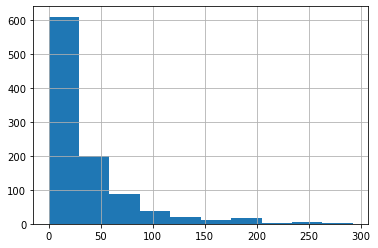

In [225]:
user_first_vid['date_diff'].hist()

Text(0, 0.5, 'Count')

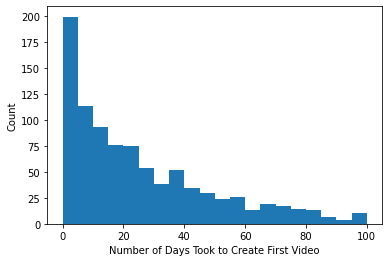

In [257]:
plt.hist(user_first_vid['date_diff'], 20, range=[0, 100]) 
plt.xlabel("Number of Days Took to Create First Video")
plt.ylabel("Count")

In [258]:
user_first_vid['date_diff'].mean()

35.26411290322581

## Data exploration

### Distribution of user registration per month

In [165]:
user['created_at'] = pd.to_datetime(user['created_at'])
user['created_at_month'] = user['created_at'].dt.month

<AxesSubplot:xlabel='created_at_month'>

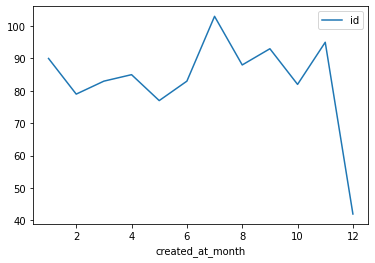

In [166]:
user_month = user.groupby('created_at_month').agg({'id': 'count'})
user_month = user_month.reset_index()
user_month.plot('created_at_month' , 'id')

There are a few surges in user registration throughout the year (July and November), but the user registration dropped significantly in December

### Merge User with Video dataframe

In [167]:
video_user_df = video.merge(user, left_on = 'creator', right_on ='id')

In [168]:
video_user_df.rename(columns={'id_x':'videoId', 'created_at_x': 'video_create_date', 
                   'created_at_y': 'user_create_date', 'class': 'user_create_class'}, inplace=True)

In [169]:
video_user_df =  video_user_df[['videoId', 'attribute_id', 'music_id', 'animation_id', 'duration',
                               'creator', 'video_create_date', 'num_shares', 'game_id',
                               'is_ar', 'user_create_date', 'user_create_class', 'created_at_month']]

In [170]:
video_user_df.head()

,videoId,attribute_id,music_id,animation_id,duration,creator,video_create_date,num_shares,game_id,is_ar,user_create_date,user_create_class,created_at_month
0,6e884071-8c0e-4782-aa40-e0fd78243360,4712e9e6-bef1-4646-b21e-ca5336901bf9,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,17dab81c-6180-4a4b-b539-91978a726cfd,5.34,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-08-04 10:42:39,12,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,True,2021-07-01 18:27:53,Super Creator,7
1,1444ecdb-3e13-4465-a901-aaf98a4cdb8d,06c496ee-e884-42f9-ba39-010a66ed5296,c3721b09-6896-465a-8e13-4d73efd06874,b5349df0-23dd-4973-b47d-ae5df5a4e247,5.02,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-09-29 15:23:22,14,6ca0f645-a16b-42b0-9dc2-2ae952c83591,False,2021-07-01 18:27:53,Super Creator,7
2,9dde23bc-25d7-4262-8197-d6aadd79d461,80f5b187-f6e6-40f2-9b6e-fe62b67049a8,3de11516-8627-47c3-98ab-265b429cac91,435320a3-8d3d-4a9d-b76b-2f2e268f7619,2.49,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-10-07 12:30:45,5,66653b7c-b600-49b3-a58c-d1862e91d426,True,2021-07-01 18:27:53,Super Creator,7
3,343f5cfd-0c28-458c-911f-4ad651841a95,3390e253-7815-4a3c-8169-fd2ab532e166,da2fc9b0-32d5-4a1b-8b40-2706eb133bf0,ff1a548b-e307-474c-a405-6370ca1a0639,5.91,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-10-16 22:47:19,19,2609b6b5-3a08-451e-bce5-75fe506559d2,False,2021-07-01 18:27:53,Super Creator,7
4,115136cf-98c3-450a-bc42-a8f69cfc59f8,7ef48c9e-776d-4d24-8c2b-e3675b295767,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,ace4c5e2-ef86-429a-aad3-23bef7a1c9f1,4.84,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-10-18 04:03:20,13,2609b6b5-3a08-451e-bce5-75fe506559d2,True,2021-07-01 18:27:53,Super Creator,7


Text(0.5, 1.0, 'Distribution of video created by class')

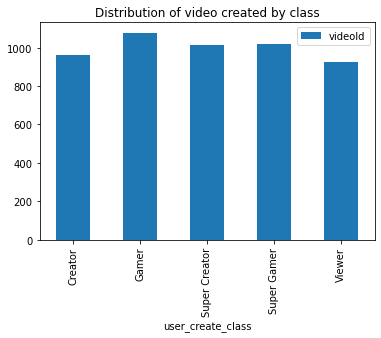

In [229]:
video_user_df.groupby('user_create_class').agg({'videoId': 'nunique'}).plot(kind='bar')
plt.xticks([0,1,2,3,4],['Creator', 'Gamer', 'Super Creator', 'Super Gamer', 'Viewer'])
plt.title("Distribution of video created by class")

Based on the title of each user class, we would assume that the Super Creator class would create the most number of videos. However, as seen from the graph, the number of videos created were pretty similar across each user class (~900 videos). Therefore, the users might be classified randomly and this attribute doesn't contribute much insight to the analysis.

### AR analysis

In [172]:
#apply filters to only include videos with AR
ar_vid = video_user_df[video_user_df['is_ar'] == True]

In [173]:
ar_vid.head()

,videoId,attribute_id,music_id,animation_id,duration,creator,video_create_date,num_shares,game_id,is_ar,user_create_date,user_create_class,created_at_month
0,6e884071-8c0e-4782-aa40-e0fd78243360,4712e9e6-bef1-4646-b21e-ca5336901bf9,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,17dab81c-6180-4a4b-b539-91978a726cfd,5.34,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-08-04 10:42:39,12,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,True,2021-07-01 18:27:53,Super Creator,7
2,9dde23bc-25d7-4262-8197-d6aadd79d461,80f5b187-f6e6-40f2-9b6e-fe62b67049a8,3de11516-8627-47c3-98ab-265b429cac91,435320a3-8d3d-4a9d-b76b-2f2e268f7619,2.49,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-10-07 12:30:45,5,66653b7c-b600-49b3-a58c-d1862e91d426,True,2021-07-01 18:27:53,Super Creator,7
4,115136cf-98c3-450a-bc42-a8f69cfc59f8,7ef48c9e-776d-4d24-8c2b-e3675b295767,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,ace4c5e2-ef86-429a-aad3-23bef7a1c9f1,4.84,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-10-18 04:03:20,13,2609b6b5-3a08-451e-bce5-75fe506559d2,True,2021-07-01 18:27:53,Super Creator,7
7,ac90ff16-24b4-46bc-ae72-2da847f9e6c9,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,6d7a0545-0bca-4bf4-a306-931e57d8ffe2,3.88,0230f9af-e89f-4886-8322-52a38eaf991c,2021-11-27 10:06:43,3,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True,2021-06-04 20:14:39,Creator,6
8,6edbf68d-7032-485a-8030-8440216c53d8,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,d53234f4-1efb-4299-97c1-11658118cba5,6d7a0545-0bca-4bf4-a306-931e57d8ffe2,5.92,0230f9af-e89f-4886-8322-52a38eaf991c,2021-08-09 11:41:43,9,66653b7c-b600-49b3-a58c-d1862e91d426,True,2021-06-04 20:14:39,Creator,6


In [174]:
#There are 924 unique users who user AR in their videos
ar_vid['creator'].nunique()

924

In [175]:
#Total number of unique users
user['id'].nunique()

1000

Over 94% of users have experienced AR videos

In [176]:
#Calculate the number of videos using AR for each creator
ar_creator = ar_vid.groupby('creator')['is_ar'].sum()
ar_creator = ar_creator.reset_index()
ar_creator.sort_values('is_ar', ascending = False).head(5)

,creator,is_ar
861,f261caed-1a26-4ab7-90ba-517d35fea76d,8
223,3fb33c17-aaf7-4921-a03a-47139f6b58d1,8
97,1cc4ac7c-a6d5-45fa-aea2-603e1f9c7231,8
797,dffff65f-e04a-4a78-b9db-1f1c194d816a,7
133,293bcb6f-c892-43aa-a92a-4729ec3513fb,7


<AxesSubplot:>

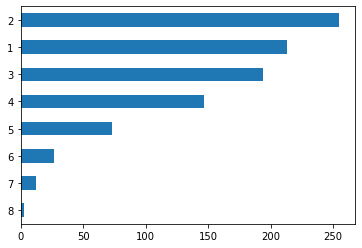

In [177]:
ar_creator.is_ar.value_counts().sort_values().plot(kind = 'barh')

In [178]:
#Calculate the total videos created by each creator
user_vid_create = video.groupby('creator').agg({'id': 'count'})
user_vid_create = user_vid_create.reset_index()
user_vid_create.sort_values('id', ascending = False).head()

,creator,id
982,fe96fb46-1629-4e5c-8a4c-d244146726c4,12
850,ddfeab0f-274a-4cab-86c2-873cbd8e485e,12
715,b86d3272-a6a0-449c-8d04-caa5fbd9260a,12
946,f7a2adb8-44d7-4408-a2a9-3a593fc6d626,11
927,f261caed-1a26-4ab7-90ba-517d35fea76d,11


<AxesSubplot:>

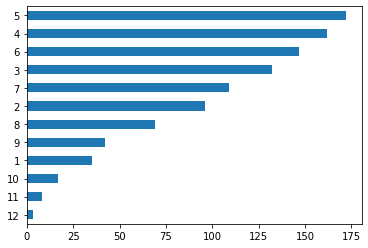

In [179]:
user_vid_create.id.value_counts().sort_values().plot(kind = 'barh')

In [180]:
user_vid_ar = ar_creator.merge(user_vid_create, on = 'creator')

In [233]:
#calculate the percentage of AR videos in total number of videos created by each creator
user_vid_ar['perct_ar'] = (user_vid_ar['is_ar'] / user_vid_ar['id'])*100
user_vid_ar = user_vid_ar.sort_values('perct_ar', ascending = False)
user_vid_ar.head()

,creator,is_ar,id,perct_ar
435,7a0a3dd6-17ad-456b-956e-ef69d719603c,2,2,100.0
872,f559d0b7-dfb8-468e-a243-ec55e46617a7,2,2,100.0
10,02b0f721-12ff-43eb-a860-0e3fed4e3d47,1,1,100.0
619,abed6038-1652-4ea2-8df1-a0bb5b33af28,2,2,100.0
809,e3554749-d9b3-4c03-821d-c605eecad0b1,2,2,100.0


Text(0.5, 1.0, 'How often users use AR in their videos')

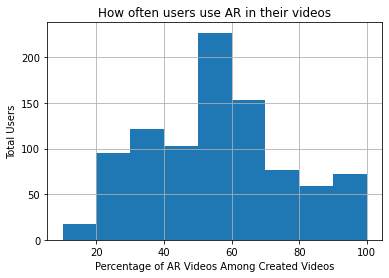

In [242]:
user_vid_ar['perct_ar'].hist(bins = [10,20,30,40,50,60,70,80,90,100])
plt.xlabel("Percentage of AR Videos Among Created Videos")
plt.ylabel("Total Users")
plt.title("How often users use AR in their videos")

In [245]:
len(user_vid_ar[user_vid_ar['perct_ar'] >= 80])

131

In [246]:
100*(131/924)

14.177489177489178

94% people tried AR but did not stick to it (only around 14% of users who made video use AR for more than or equal to  80% of their videos)

### Engagement analysis  -- Month

In [183]:
video['created_at'] = pd.to_datetime(video['created_at'])
video['created_at_month'] = video['created_at'].dt.month

In [259]:
video.head()

,Unnamed: 0,id,attribute_id,music_id,animation_id,duration,creator,created_at,num_shares,game_id,is_ar,created_at_month
0,0,6e884071-8c0e-4782-aa40-e0fd78243360,4712e9e6-bef1-4646-b21e-ca5336901bf9,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,17dab81c-6180-4a4b-b539-91978a726cfd,5.34,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-08-04 10:42:39,12,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,True,8
1,1,ac90ff16-24b4-46bc-ae72-2da847f9e6c9,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,6d7a0545-0bca-4bf4-a306-931e57d8ffe2,3.88,0230f9af-e89f-4886-8322-52a38eaf991c,2021-11-27 10:06:43,3,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True,11
2,2,fb5eaf0d-e72c-4523-b5c5-4d9c323cef5f,80f5b187-f6e6-40f2-9b6e-fe62b67049a8,d53234f4-1efb-4299-97c1-11658118cba5,716c02df-bd3a-41c9-b2be-86fb74ff3255,5.15,fbf93fbf-a935-436f-8516-8acb863e779f,2021-02-26 04:18:53,4,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True,2
3,3,bbf89dcb-7fbd-439d-9a7d-36ef7a1c2aa3,02b2b662-1b39-4d91-9417-dddc9451d8e1,19e4db13-d854-4913-a8ca-3612ee1a6071,b7bd5204-2976-4eb0-ab71-508a848bc325,6.50,f7a2adb8-44d7-4408-a2a9-3a593fc6d626,2021-11-27 02:08:02,9,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,False,11
4,4,4c613ec6-fa6f-47e8-b4ab-658e2f6a644d,06c496ee-e884-42f9-ba39-010a66ed5296,b5b679a5-e769-4d95-82a6-f75e439b1ef9,17dab81c-6180-4a4b-b539-91978a726cfd,4.38,d9f9538f-1b7e-4f35-805d-924b309d75d8,2021-11-17 11:06:32,14,2609b6b5-3a08-451e-bce5-75fe506559d2,False,11


In [201]:
video_create_month = video.groupby('created_at_month').agg({'id': 'count', 'creator': 'nunique'})
video_create_month = video_create_month.reset_index()
video_create_month.rename(columns={'created_at_month':'month', 'id': 'num_video_created', 
                   'creator': 'active_creator'}, inplace=True)

In [202]:
video_create_month

,month,num_video_created,active_creator
0,1,16,15
1,2,45,40
2,3,109,85
3,4,150,112
4,5,209,162
5,6,231,179
6,7,364,269
7,8,453,316
8,9,595,411
9,10,804,478


Text(0.5, 1.0, 'Comparision Between Number of Videos Created and Number of Active Creators')

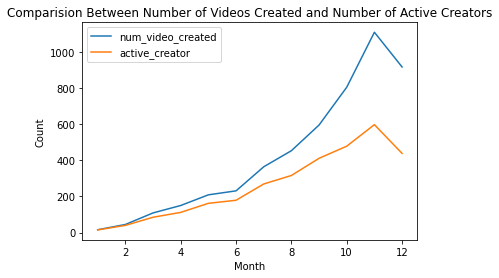

In [247]:
video_create_month.set_index('month').plot()
plt.xlabel('Month')
plt.ylabel("Count")
plt.title("Comparision Between Number of Videos Created and Number of Active Creators")

Number of videos created gradually increased towards the end of the year, with a surge in November.

In [205]:
watchedVideo['dateTime'] = pd.to_datetime(watchedVideo['dateTime'])
watchedVideo['month_watch'] = watchedVideo['dateTime'].dt.month

In [206]:
watchedVideo.head()

,Unnamed: 0,coordinates,os,duration,videoId,userId,appVersion,dateTime,feedId,month_watch
0,0,"(Decimal('14.439490'), Decimal('105.291233'))",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,30134b9e-1b79-43fb-b0c5-373af9237b2c,8
1,1,"(Decimal('40.866935'), Decimal('-73.845013'))",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,8078efe7-5bae-4528-9a66-b85904cc73ac,7
2,2,"(Decimal('48.666850'), Decimal('9.359456'))",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,12
3,3,"(Decimal('5.172365'), Decimal('-74.439009'))",Android,2.81,8ffc47e3-32ce-4d24-a990-9baac556603b,960fb90e-eddc-478a-a64a-04b9dded3a05,2.1.2,2021-12-04 21:02:50,42568c8a-efbe-4293-81a3-513e33094ade,12
4,4,"(Decimal('4.063707'), Decimal('9.606159'))",iOS,5.88,47e70477-7511-4bd0-801b-1651f951002f,1ce0c003-25e7-473f-8796-0fe04d6c275c,2.1.2,2021-11-28 16:12:39,582520b2-b30a-4ecb-b1b4-1806672fcfc4,11


In [207]:
watch_vid_month = watchedVideo.groupby('month_watch').agg({'videoId': 'count', 'userId': 'nunique'})
watch_vid_month = watch_vid_month.reset_index()
watch_vid_month.rename(columns = {'userId': 'active_watcher'}, inplace=True)

In [209]:
vid_engagement = video_create_month.merge(watch_vid_month, left_on = 'month', right_on = 'month_watch')

In [211]:
vid_engagement = vid_engagement[['month', 'num_video_created', 'active_creator', 'videoId', 'active_watcher']]
vid_engagement.rename(columns={'videoId': 'num_video_watched'}, inplace=True)

/Users/phuongtran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [213]:
vid_engagement['vid_watched_per_user'] = vid_engagement['num_video_watched'] / vid_engagement['active_watcher']
vid_engagement['vid_created_per_user'] = vid_engagement['num_video_created'] / vid_engagement['active_creator']

In [214]:
vid_engagement

,month,num_video_created,active_creator,num_video_watched,active_watcher,vid_watched_per_user,vid_created_per_user
0,1,16,15,1,1,1.000000,1.066667
1,2,45,40,8,8,1.000000,1.125000
2,3,109,85,25,24,1.041667,1.282353
3,4,150,112,80,74,1.081081,1.339286
4,5,209,162,213,161,1.322981,1.290123
5,6,231,179,385,268,1.436567,1.290503
6,7,364,269,817,434,1.882488,1.353160
7,8,453,316,1696,624,2.717949,1.433544
8,9,595,411,3122,762,4.097113,1.447689
9,10,804,478,6312,856,7.373832,1.682008


Text(0.5, 1.0, 'User Engagement -- Video Watched')

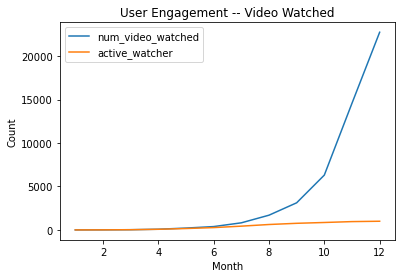

In [251]:
vid_engagement.plot(x="month", y=["num_video_watched", 'active_watcher'])
plt.xlabel('Month')
plt.ylabel("Count")
plt.title("User Engagement -- Video Watched")

Text(0.5, 1.0, 'User Engagement -- Number of Video per User')

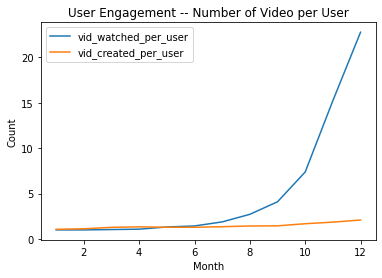

In [253]:
vid_engagement.plot(x="month", y=["vid_watched_per_user", "vid_created_per_user"])
plt.xlabel('Month')
plt.ylabel("Count")
plt.title("User Engagement -- Number of Video per User")

### Engagement analysis -- Day of Week

In [39]:
watchedVideo['day_of_week_video_watched'] = watchedVideo['dateTime'].dt.day_name()

In [40]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
watch_vid_day = watchedVideo.groupby('day_of_week_video_watched').agg({'videoId': 'count', 'duration': 'sum'})
watch_vid_day = watch_vid_day.reset_index()
watch_vid_day = watch_vid_day.set_index('day_of_week_video_watched').reindex(cats).reset_index()

In [41]:
watch_vid_day.rename(columns={'videoId':'total_vid_watch'}, inplace=True)
watch_vid_day['avg_time_per_vid'] = watch_vid_day['duration'] / watch_vid_day['total_vid_watch']
watch_vid_day

,day_of_week_video_watched,total_vid_watch,duration,avg_time_per_vid
0,Monday,7489,25628.45,3.422146
1,Tuesday,8382,28689.55,3.422757
2,Wednesday,8429,28756.02,3.411558
3,Thursday,5840,19778.12,3.386664
4,Friday,6308,21538.76,3.414515
5,Saturday,6552,22197.52,3.387900
6,Sunday,7000,23923.07,3.417581


<AxesSubplot:xlabel='day_of_week_video_watched'>

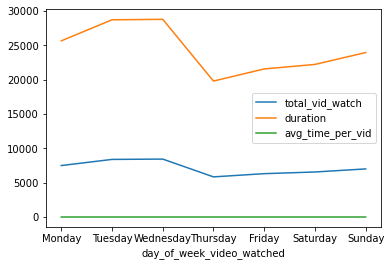

In [42]:
watch_vid_day.set_index('day_of_week_video_watched').plot()